## CMX Spectra

Messing around with some of the initial spectra.

#### M33 (press release data)
* [20191022 / 00019985 - M33 on 300s RA=23.475, DEC=+31.7375](http://legacysurvey.org/viewer-dev?ra=23.475&dec=31.7575&layer=unwise-neo4&zoom=8&desifiber=23.4750,31.7575)
* [20191022 / 00019988 - M33 off 300s RA=23.4283, DEC=+29.7501](http://legacysurvey.org/viewer-dev?ra=23.475&dec=29.7501&layer=unwise-neo4&zoom=8&desifiber=23.4750,29.7500)
* 20191022 / 00019990 - M33 on 600s RA=23.475, DEC=+31.7375
* 20191022 / 00019991 - M33 on 600s RA=23.475, DEC=+32.0375
* 20191022 / 00020000 - M33 off 600s RA=23.4283, DEC=+29.7501

#### California Nebula

NGC1499 "California Nebula": these are diffuse enough that the "pick some random fibers as sky" for sframe doesn't work, so you'll want to subtract the fframe files from the on/off sequences to do sky subtraction
* 20191022 / 00020095 - on 
* 20191022 / 00020096 - off
* 20191022 / 00020097 - on
* 20191022 / 00020098 - off
* 20191022 / 00020099 - on
* 20191022 / 00020100 - off

#### Dither Data
* 20191206 / 00030951 - fibers positioned on stars + SDSS Main galaxies

In [5]:
import os
import numpy as np

In [6]:
import desispec.io
import desimodel.io
import desimodel.io

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='talk', style='ticks', font_scale=1.1)
%matplotlib inline

#### Find the data

In [8]:
fp = desimodel.io.load_focalplane()[0]
#fp

In [15]:
datadir = os.getenv('DESI_ROOT')+'/spectro/data'
reduxdir = os.getenv('DESI_ROOT')+'/spectro/redux/daily/exposures'
baileydir = os.getenv('DESI_ROOT')+'/spectro/redux/sjbailey/exposures'

In [20]:
def read_spec(cam='b', spectype='sframe', specid=3, night=20191022, expid=20095, bailey=False):
    strexpid = '{:08d}'.format(expid)
    if bailey:
        ddir = baileydir
    else:
        ddir = reduxdir
    specfile = os.path.join(ddir, str(night), strexpid, '{}-{}{:d}-{}.fits'.format(
        spectype, cam, specid, strexpid))
    print('Reading {}'.format(specfile))
    sr = desispec.io.read_frame(specfile)
    return sr

### M33

In [35]:
r_onspec = read_spec(cam='r', expid=19985, bailey=True)
r_offspec = read_spec(cam='r', expid=19988, bailey=True)

Reading /global/project/projectdirs/desi/spectro/redux/sjbailey/exposures/20191022/00019985/sframe-r3-00019985.fits
Reading /global/project/projectdirs/desi/spectro/redux/sjbailey/exposures/20191022/00019988/sframe-r3-00019988.fits


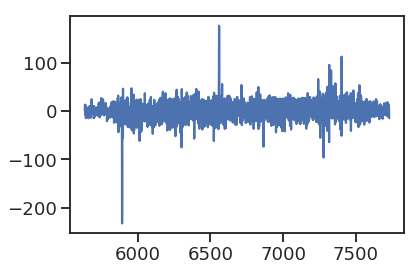

In [43]:
plt.plot(r_onspec.wave, r_onspec.flux[100, :])

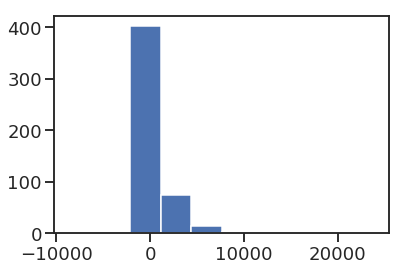

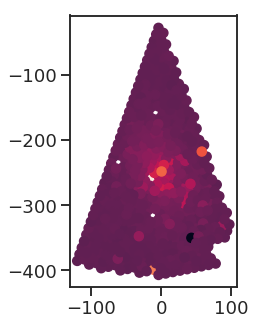

In [42]:
flux = r_onspec.flux# - offspec.flux
#ii = (3722 < r_onspec.wave) & (r_onspec.wave < 3735)
ii = (6540 < r_onspec.wave) & (r_onspec.wave < 6600)

keep = (fp['PETAL'] == 0) & (fp['DEVICE_TYPE'] == 'POS')
kfp = fp[keep]
kfp.sort('FIBER')
lineflux = flux[:, ii].sum(axis=1)
plt.hist(lineflux)

plt.figure(figsize=(3,5))
plt.scatter(kfp['OFFSET_X'], kfp['OFFSET_Y'], c=lineflux)

(500, 2326)


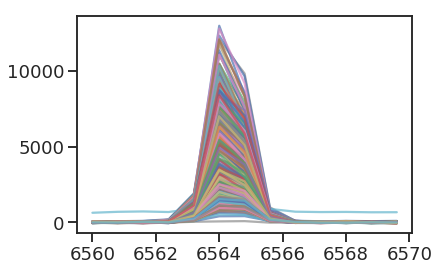

In [19]:
ii = (3722 < onspec.wave) & (onspec.wave < 3735)
ii = (6540 < onspec.wave) & (onspec.wave < 6600)
ii = (6560 < onspec.wave) & (onspec.wave < 6570)

flux = onspec.flux - offspec.flux
print(flux.shape)
#plt.plot(onspec.wave, flux.mean(axis=0))
for ff in flux[:, ii]:
    plt.plot(onspec.wave[ii], ff, alpha=0.7)
#plt.plot(onspec.wave[ii], flux[:, ii])#.mean(axis=0))    

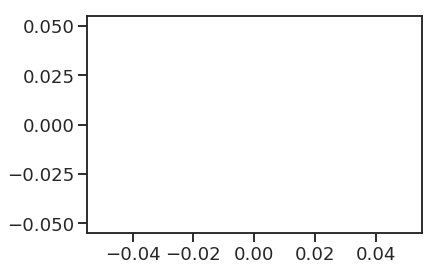

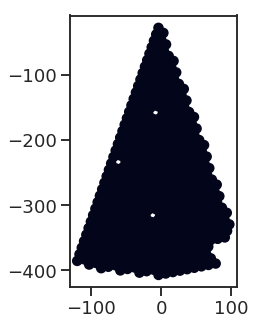

In [13]:
flux = onspec.flux - offspec.flux
ii = (3722 < onspec.wave) & (onspec.wave < 3735)
plt.plot(onspec.wave[ii], flux[:,ii].mean(axis=0))

keep = (fp['PETAL'] == 0) & (fp['DEVICE_TYPE'] == 'POS')
kfp = fp[keep]
kfp.sort('FIBER')
OIIflux = flux[:, ii].sum(axis=1)

plt.figure(figsize=(3,5))
plt.scatter(kfp['OFFSET_X'], kfp['OFFSET_Y'], c=OIIflux)

### California Nebula

In [ ]:
cam = 'r'
onspec, offspec = read_spec(cam=cam, expid=20095), read_spec(cam=cam, expid=20096)

In [23]:
def plot_spec(bcam, rcam, zcam, fiberid=307):
    fig, ax = plt.subplots()
    #ax.plot(bcam.wave, bcam.flux[fiberid, :])
    #ax.plot(rcam.wave, rcam.flux[fiberid, :])
    #ax.plot(zcam.wave, zcam.flux[fiberid, :])
    
    ax.plot(bcam.wave, bthru.photons(bcam.wave, bcam.flux[fiberid, :]))

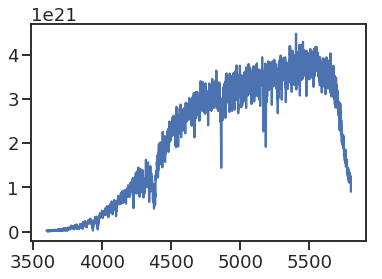

In [24]:
plot_spec(bcam, rcam, zcam, fiberid=307)

In [57]:
bcam.meta

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2751                                                  
NAXIS2  =                  500                                                  
EXTEND  =                    T                                                  
EXTNAME = 'FLUX    '                                                            
INSTRUME= 'DESI    '           / Instrument name                                
PROCTYPE= 'RAW     '           / Data processing level                          
PRODTYPE= 'image   '           / Data product type                              
PROGRAM = 'Dither tile_id 63064 (0.5,7.5)' / Program name                       
EXPID   =                29181 / Exposure number                                
EXPFRAME=                   

In [56]:
dir(bcam)

['R',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'chi2pix',
 'fibermap',
 'fibers',
 'flux',
 'ivar',
 'mask',
 'meta',
 'ndiag',
 'nspec',
 'nwave',
 'resolution_data',
 'scores',
 'scores_comments',
 'spectrograph',
 'vet',
 'wave',
 'wsigma']

In [53]:
def read_fibermap(night=20191116, expid=28818, fiberassignid=63064):
    strexpid = '{:08d}'.format(expid)
    strfiberassignid = '{:06d}'.format(fiberassignid)
                  
    fiberassignfile = os.path.join(datadir, str(night), strexpid, 'fiberassign-{}.fits'.format(
        strfiberassignid))
    sr = desispec.io.read_frame(specfile)
    return sr

In [11]:
dir(bthru)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_extinction',
 '_fiberinput',
 '_hc',
 '_throughput',
 '_thru',
 '_wave',
 'apply_throughput',
 'area',
 'atmospheric_throughput',
 'exptime',
 'extinction',
 'fiberarea',
 'fiberdia',
 'fiberinput_throughput',
 'hardware_throughput',
 'photons',
 'thru',
 'wavemax',
 'wavemin']

In [26]:
help(bthru.thru)

Help on method thru in module specter.throughput:

thru(*args, **kwargs) method of specter.throughput.Throughput instance
    same as calling self(*args, **kwargs)

